In [209]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, silhouette_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [210]:
#Carregar o Dataset
akc_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/akc-data-latest.csv').rename(columns={'Unnamed: 0': 'breed'})

# Pré-Processamento
Nessa fase vamos  tratar os dados para que possam ser usados de uma forma mais eficiente no nosso algoritmo. Alguns passos do pre-processamento são:

1 - Limpeza de dados: Faz a remoção ou correção de dados ausentes, inconsistentes ou incorretos para garantir a qualidade dos dados antes da análise.   
2 - Transformação de dados: Inclui a normalização, padronização ou codificação de variáveis para que os dados estejam em um formato adequado para análise ou modelagem.  
3 - Seleção de características: As características mais relevantes e significativas para o problema em questão são selecionadas, reduzindo a dimensionalidade dos dados e melhorando a eficiência dos modelos.  
4 - Divisão dos dados: Os dados são divididos em conjuntos de treinamento e teste para avaliar o desempenho do modelo em dados não vistos. Ajuda a evitar o overfitting a avaliar a capacidade de generalização do modelo.  
5 - Balanceamento de classes (opcional): Quando há um desequilíbrio entre classes, pode ser usado oversampling, undersampling ou geração de dados sintéticos.  

In [211]:
#mostra a tabela completa
akc_data

,breed,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,WVs are close relatives of Vizslas but a disti...,"Gentle, Loyal, Trainable",167,54.61,63.50,20.411657,29.483504,12.0,14.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
273,Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive
274,Xoloitzcuintli,The Xoloitzcuintli (show-low-eats-queen-tlee) ...,"Loyal, Alert, Calm",140,25.40,58.42,4.535924,24.947580,13.0,18.0,...,0.2,Occasional Bath/Brush,0.2,Infrequent,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
275,Yakutian Laika,For centuries the Yakutian Laika was an irrepl...,"Affectionate, Intelligent, Active",NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,...,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.2,May be Stubborn,0.4,Reserved with Strangers


In [212]:
#confere as quantidades de 'Nan' por coluna
nan_counts = akc_data.isna().sum()
print(nan_counts)

breed                           0
description                     0
temperament                     1
popularity                     79
min_height                      0
max_height                      0
min_weight                      2
max_weight                      2
min_expectancy                  3
max_expectancy                  3
group                           0
grooming_frequency_value        7
grooming_frequency_category     7
shedding_value                 20
shedding_category              20
energy_level_value              6
energy_level_category           6
trainability_value             24
trainability_category          24
demeanor_value                 25
demeanor_category              25
dtype: int64


Analisando as colunas do CSV, decidiu-se remover os seguintes atributos:

- breed:
- description
- temperament
- popularity
- grooming_frequency_category
- shedding_category
- energy_level_gategory
- trainability_category
- demeanor_category

Breed (raça) foi removido por ser considerado prejudicial sendo usado como parâmetro de entrada, uma vez que cada obejto possui uma raça diferente.

Description e temperament foram removidos por serem considerados atributos muito subjetivos.

Popularity foi removida por possuir uma quantidade significativa (79/277) de elementos com valor 'Nan'.

Já as colounas finalizadas em "_category" foram removidas por já terem seus correspondentes númericos, tornando sua presença redundante.

In [213]:
#remove as colunas indesejadas
akc_data.drop(columns=["breed", "description", "temperament", "popularity", "grooming_frequency_category", "shedding_category", "energy_level_category", "trainability_category", "demeanor_category"], axis=1, inplace=True)

akc_data.describe()

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
count,277.000000,277.000000,275.000000,275.000000,274.000000,274.000000,270.000000,257.000000,271.000000,253.000000,252.000000
mean,44.225801,52.720588,17.888858,27.291416,11.306569,13.832117,0.425926,0.529183,0.712915,0.624506,0.620635
std,14.238298,15.885454,12.290600,19.061416,1.817949,2.016668,0.198306,0.189068,0.168927,0.247271,0.201713
min,12.700000,17.780000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,33.020000,38.100000,8.164663,12.927383,10.000000,13.000000,0.200000,0.400000,0.600000,0.400000,0.400000
50%,45.085000,53.340000,15.875733,24.947580,12.000000,14.000000,0.400000,0.600000,0.600000,0.600000,0.600000
75%,55.880000,66.040000,22.679619,34.019428,12.000000,15.000000,0.600000,0.600000,0.800000,0.800000,0.800000
max,76.200000,88.900000,68.038855,108.862169,16.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Remoção de incoerências
Nesse passo iremos evitar as inconsistências nos dados, tais como valores minimos maiores que os maximos, valores de peso, altura e expectativa de vida negativos e presença de dados duplicados.

In [214]:
#verifica se as alturas são positivas e se o maximo eh maior que o minimo
heightFixed = ((akc_data['max_height'] > 0.00) & (akc_data['min_height'] > 0.00) & (akc_data['max_height'] >= akc_data['min_height']))
akc_data = akc_data[heightFixed]

#verifica se os pesos são positivos e se o maximo eh maior que o minimo
weightFixed = ((akc_data['max_weight'] > 0.00) & (akc_data['min_weight'] > 0.00) & (akc_data['max_weight'] >= akc_data['min_weight']))
akc_data = akc_data[weightFixed]

#verifica se as expectativas de vida são positivas e se o maximo eh maior que o minimo
expectancyFixed = ((akc_data['max_expectancy'] > 0.00) & (akc_data['min_expectancy'] > 0.00) & (akc_data['max_expectancy'] >= akc_data['min_expectancy']))
akc_data = akc_data[expectancyFixed]

#remove duplicados
akc_data.drop_duplicates()

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
1,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
2,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
3,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
4,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
272,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6
273,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6
274,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6
275,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4


In [215]:
#confere as quantidades de 'Nan' por coluna
nan_counts = akc_data.isna().sum()
print(nan_counts)

min_height                   0
max_height                   0
min_weight                   0
max_weight                   0
min_expectancy               0
max_expectancy               0
group                        0
grooming_frequency_value     7
shedding_value              19
energy_level_value           6
trainability_value          23
demeanor_value              24
dtype: int64


##Preenchimento de dados ausentes
Como ainda possuimos algumas poucas colunas com dados ausentes (grooming_frequency_value, shedding_value, energy_level_value, trainability_value, demeanor_value), iremos usar o metodo KNN por possuir um melhor desempenho em comparação com métodos simples, levando em consideração a estrutura e a relação dos dados, fornecendo estimativas mais precisas.

In [216]:
#Eliminar da coluna as linhas em que a for NaN
akc_data['group'].replace('', np.nan, inplace=True)
akc_data.dropna(subset=['group'], inplace=True)

#Atributos que terão espaços preenchidos
atributes = ["grooming_frequency_value", "shedding_value", "energy_level_value", "trainability_value", "demeanor_value"]

# Instanciar o imputador KNN
imputer = KNNImputer(n_neighbors=5, weights ="distance")

# Preencher os valores faltantes com base nos vizinhos mais próximos
akc_data[atributes] = imputer.fit_transform(akc_data[atributes])

#verificar se há valores faltantes
value_null = akc_data[atributes].isnull().sum()
print(value_null)

grooming_frequency_value    0
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64


<ipython-input-216-7550f97ab7d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  akc_data['group'].replace('', np.nan, inplace=True)
<ipython-input-216-7550f97ab7d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  akc_data.dropna(subset=['group'], inplace=True)
<ipython-input-216-7550f97ab7d0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  akc_data[atributes] = imputer.fit_t

In [217]:
#exibe o DataFrame pre-processado
akc_data

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
1,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
2,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
3,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
4,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
272,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6
273,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6
274,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6
275,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4


In [218]:
akc_data.group.value_counts()

group
Foundation Stock Service    64
Hound Group                 32
Terrier Group               31
Sporting Group              31
Working Group               30
Herding Group               29
Toy Group                   21
Non-Sporting Group          21
Miscellaneous Class         11
Name: count, dtype: int64

##Boxplot
Usaremos o boxplot para:
- Identificar a presença de possíveis outliers.
- Obter informações sobre a distribuição dos dados, tais como a mediana, os quartis e a amplitude interquartil.
- Comparar distribuições entre diferentes grupos ou categorias.
- Visualizar a simetria ou assimetria da distribuição dos dados.

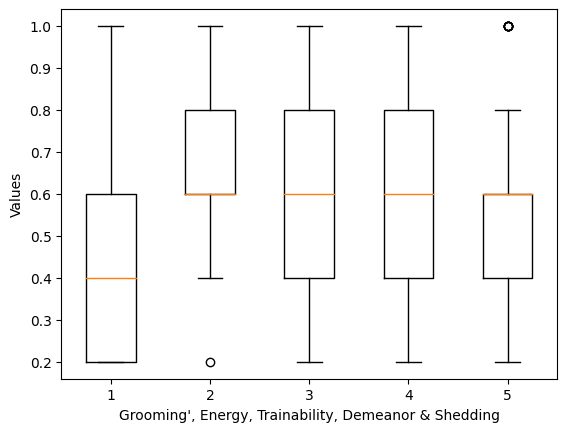

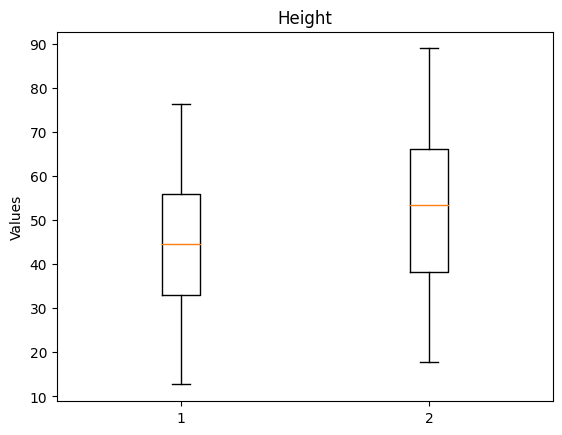

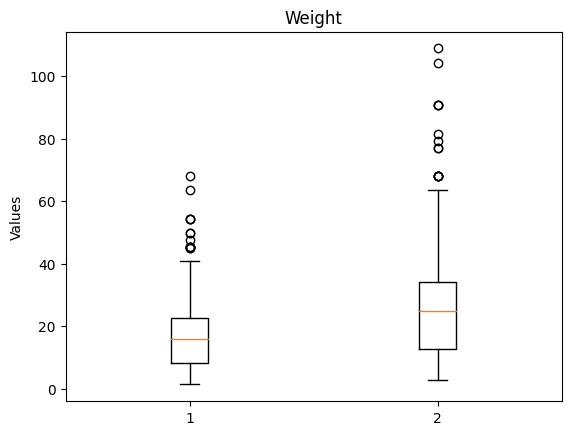

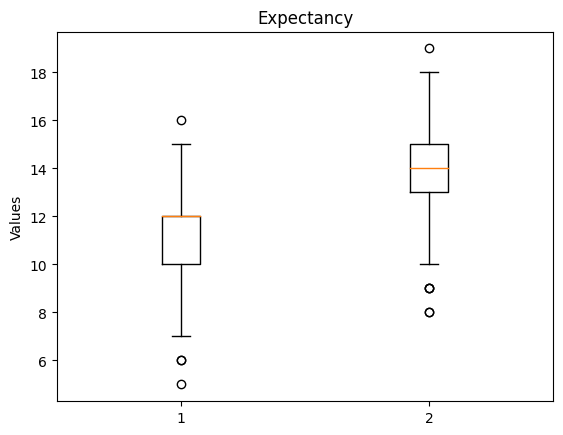

In [219]:
fig = plt.figure()
plt.ylabel("Values")
plt.xlabel("Grooming', Energy, Trainability, Demeanor & Shedding")
plt.boxplot([akc_data['grooming_frequency_value'].values, akc_data['energy_level_value'].values, akc_data['trainability_value'].values, akc_data['demeanor_value'].values, akc_data['shedding_value'].values])
plt.show()

fig = plt.figure()
plt.ylabel("Values")
plt.title("Height")
plt.boxplot([akc_data['min_height'].values, akc_data['max_height'].values])
plt.show()

fig = plt.figure()
plt.ylabel("Values")
plt.title("Weight")
plt.boxplot([akc_data['min_weight'].values, akc_data['max_weight'].values])
plt.show()

fig = plt.figure()
plt.ylabel("Values")
plt.title("Expectancy")
plt.boxplot([akc_data['min_expectancy'].values, akc_data['max_expectancy'].values])
plt.show()

##Balanceamento
Para evitar um enviesamento do modelo resultante, iremos fazer um  oversample aleatório do dataframe, aumentando de forma artificial os objetos das classes minoritárias.

In [220]:
ros = RandomOverSampler(random_state=42)
X = akc_data.drop(['group'], axis=1)
y = akc_data.group
X_resampled, y_resampled = ros.fit_resample(X, y)

<ipython-input-221-e77ea40bde55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set1")


<Axes: xlabel='group', ylabel='count'>

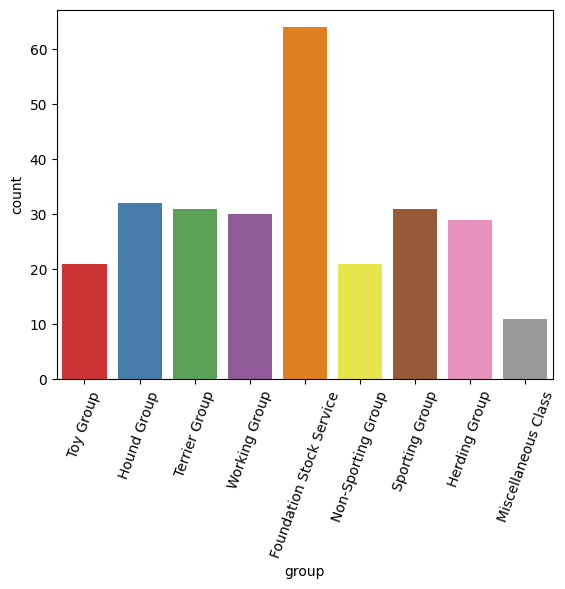

In [221]:
#Antes do balanceamento
plt.xticks(rotation=70)
sns.countplot(x=y, palette="Set1")

<ipython-input-222-b39aa1432504>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set1")


<Axes: xlabel='group', ylabel='count'>

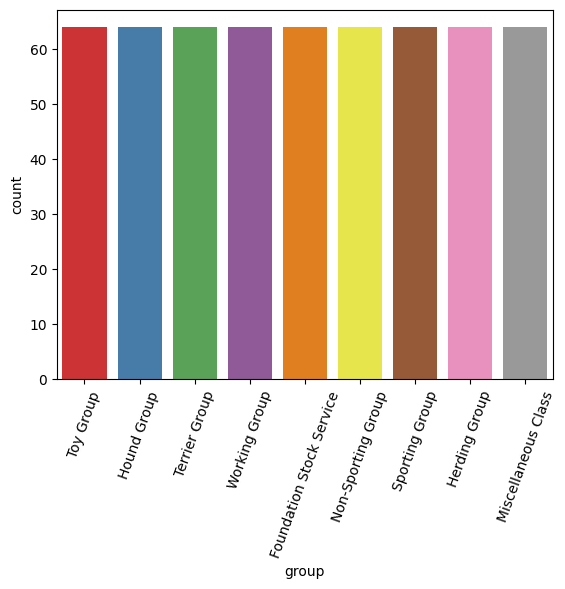

In [222]:
#Após balanceamento
plt.xticks(rotation=70)
sns.countplot(x=y_resampled, palette="Set1")

##Normalização dos dados
Nessa etapa vamos normalizar os dados para obter um equilibrio entre os recursos, ou seja, coloca todas as variáveis em uma escala comparável. Isso é particularmente importante quando diferentes características têm unidades ou escalas muito diferentes. Além de eliminar o viés de algoritmos que utilizam medidas de distância, como o KNN.  
Em geral, a normalização dos dados pode levar a modelos mais estáveis e com melhor desempenho, especialmente em algoritmos sensíveis à escala dos dados.

In [223]:
# Selecionar as colunas numéricas para normalização
numColumns = akc_data.select_dtypes(include='number').columns

# Criar uma instância do StandardScaler
scaler = StandardScaler()

# Aplicar a escala mínima-máxima nas colunas selecionadas
akc_data[numColumns] = scaler.fit_transform(akc_data[numColumns])

#Atributos entrada e saída
- Escolhemos o atributo 'group' como saída.
- Os atributos de entrada estão sendo representados por 'X', enquanto o atributo alvo por 'y'.

In [224]:
#Evitar que o atributo alvo não entre com os atribuos de entrada
akc_data_2 = akc_data.copy()
X = akc_data_2.drop('group', axis=1)

#Definir 'group' como target (saída)
y = akc_data_2["group"]

##Amostragem

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, stratify = y_resampled, random_state = 42)

#Redução de dimensionalidade

- Vamos usar heatmap para plotar e analisar a correlação entre os atributos de entrada.
- Após isso, iremos dropar ou fundir atributos com forte correlação entre si.
- Tudo isso é feito afim de melhorar a eficiência do modelo diminuindo seu custo computacional e possivelmente melhorando seus resultados.

In [226]:
corr = akc_data_2.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
min_height,1.000000,0.935112,0.825014,0.801873,-0.504807,-0.518707,-0.177614,0.280150,0.185083,-0.027365,-0.227468
max_height,0.935112,1.000000,0.804498,0.817340,-0.471856,-0.508941,-0.235779,0.313064,0.205014,-0.024761,-0.277641
min_weight,0.825014,0.804498,1.000000,0.947405,-0.620639,-0.642030,-0.138670,0.270582,-0.055673,-0.093366,-0.242342
max_weight,0.801873,0.817340,0.947405,1.000000,-0.584678,-0.604172,-0.120219,0.258505,-0.062238,-0.032376,-0.221429
min_expectancy,-0.504807,-0.471856,-0.620639,-0.584678,1.000000,0.720219,0.022267,-0.247742,0.018960,0.104877,0.167240
max_expectancy,-0.518707,-0.508941,-0.642030,-0.604172,0.720219,1.000000,0.129093,-0.354068,0.032310,0.090437,0.139433
grooming_frequency_value,-0.177614,-0.235779,-0.138670,-0.120219,0.022267,0.129093,1.000000,-0.055383,-0.159848,0.097150,0.109321
shedding_value,0.280150,0.313064,0.270582,0.258505,-0.247742,-0.354068,-0.055383,1.000000,0.179401,0.031006,-0.182183
energy_level_value,0.185083,0.205014,-0.055673,-0.062238,0.018960,0.032310,-0.159848,0.179401,1.000000,0.075989,-0.036676
trainability_value,-0.027365,-0.024761,-0.093366,-0.032376,0.104877,0.090437,0.097150,0.031006,0.075989,1.000000,0.344651


##Novas colunas após a análise de correlação
De acordo com o heatmap, temos uma alta correlação positiva entre
- min_height e max_height
- min_height e min_weight
- min_height e max_weight
- max_height e min_weight
- max_height e max_weight
- min_weight e max_weight
- max_expectancy e min_expectancy

Dessa forma, iremos nos beneficiar da alta correlação entre as colunas
- min_height e max_height
- min_weight e max_weight
- max_expectancy e min_expectancy

Para diminuir nosso dimensionalidade, utilizando PCA e gerando novos 3 atributos, eliminando os antigos.

In [227]:
#Médias da altura
heightMin = np.array(akc_data_2['min_height'])
heightMax = np.array(akc_data_2['max_height'])
aux = np.c_[heightMin - heightMin.mean(), heightMax - heightMax.mean()]
pca = PCA(n_components = 1, copy = True)
heightNew = pca.fit_transform(aux)
akc_data_2['height'] = heightNew

#Médias do peso
weightMin = np.array(akc_data_2['min_weight'])
weightMax = np.array(akc_data_2['max_weight'])
aux = np.c_[weightMin - weightMin.mean(), weightMax - weightMax.mean()]
pca = PCA(n_components = 1, copy = True)
weightNew = pca.fit_transform(aux)
akc_data_2['weight'] = weightNew

#Médias da expectativa
expectancyMin = np.array(akc_data_2['min_expectancy'])
expectancyMax = np.array(akc_data_2['max_expectancy'])
aux = np.c_[expectancyMin - expectancyMin.mean(), expectancyMax - expectancyMax.mean()]
pca = PCA(n_components = 1, copy = True)
expectancyNew = pca.fit_transform(aux)
akc_data_2['expectancy'] = expectancyNew

#Médias da altura e peso (será usada posteriormente)
meanHeight = (akc_data_2['min_height'] + akc_data_2['max_height'])/2
meanWeight = (akc_data_2['min_weight'] + akc_data_2['max_weight'])/2

#Excluiu as colunas relacionadas a peso, altura e expectativa e adiciona suas respectivas médias
akc_data_2 = akc_data_2.drop(columns=["min_height", "max_height", "min_weight", "max_weight", "min_expectancy", "max_expectancy"])

corr = akc_data_2.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,height,weight,expectancy
grooming_frequency_value,1.000000,-0.055383,-0.159848,0.097150,0.109321,0.210133,-0.131181,-0.081603
shedding_value,-0.055383,1.000000,0.179401,0.031006,-0.182183,-0.301539,0.268092,0.324454
energy_level_value,-0.159848,0.179401,1.000000,0.075989,-0.036676,-0.198292,-0.059746,-0.027641
trainability_value,0.097150,0.031006,0.075989,1.000000,0.344651,0.026496,-0.063714,-0.105299
demeanor_value,0.109321,-0.182183,-0.036676,0.344651,1.000000,0.256754,-0.234996,-0.165336
height,0.210133,-0.301539,-0.198292,0.026496,0.256754,1.000000,-0.836761,-0.549275
weight,-0.131181,0.268092,-0.059746,-0.063714,-0.234996,-0.836761,1.000000,0.669708
expectancy,-0.081603,0.324454,-0.027641,-0.105299,-0.165336,-0.549275,0.669708,1.000000


##Comparação entre a dimensão inicial e final

In [228]:
print("Dimensão inicial: ", akc_data.shape)
print("Dimensão final: ", akc_data_2.shape)

Dimensão inicial:  (270, 12)
Dimensão final:  (270, 9)


In [229]:
#redefinindo os valores após o pré-processamento
X = akc_data_2.drop(['group'], axis=1)
y = akc_data_2.group
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, stratify = y_resampled, random_state = 42)

#Aprendizagem supervisionada

Aqui vamos comparar 3 modelos, sendo eles Árvore de Decisão, Naive Bayes e MLP (todos com e sem validação cruzada 10-fold) e para a análise dos resultados iremos usar acurácia, F1-score e matriz de confusão.

##Árvore de Decisão


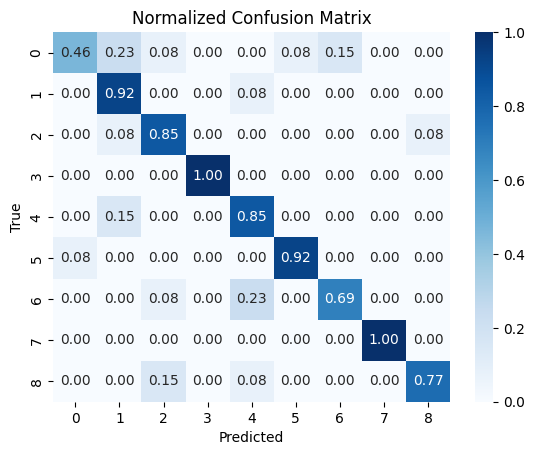

Acurácia do modelo antes do sfk: 82.76%
F1-Score do modelo antes do sfk: 82.35%


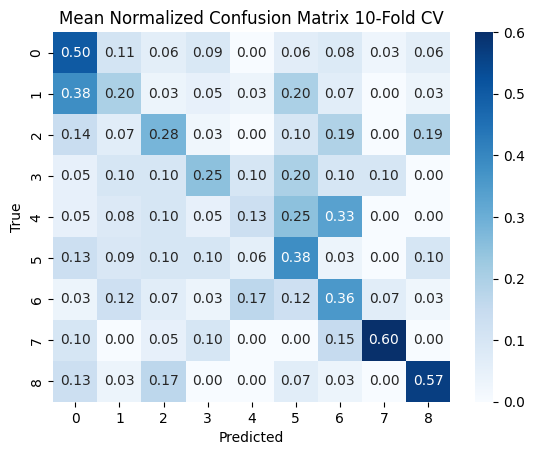

Média da Acurácia do modelo depois do sfk: 39.26%
Média do F1-Score do modelo depois do sfk: 37.79%


In [230]:
X = np.array(X)
y = np.array(y)

decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# antes do sfk
decision_tree_classifier.fit(X_train, y_train)

#fazer as predições com o conjunto de teste
y_pred = decision_tree_classifier.predict(X_test)

#calcular a acuracia do modelo
accuracy = accuracy_score(y_test, y_pred)

#calcular o f1-score do modelo
f1 = f1_score(y_test, y_pred, average='weighted')

#calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
norm_conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

#montar e exibir o grafico da matriz de confusão
plt.figure()
sns.heatmap(norm_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()
print('Acurácia do modelo antes do sfk: {:.2f}%'.format(accuracy * 100))
print('F1-Score do modelo antes do sfk: {:.2f}%'.format(f1 * 100))


# depois do sfk
sfk = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
confusion_matrices = []

for train_index, test_index in sfk.split(X, y):
  #Dividir os dados de teste e treino
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  decision_tree_classifier.fit(X_train, y_train)

  #fazer as predições com o conjunto de teste
  y_pred = decision_tree_classifier.predict(X_test)

  #calcular a acuracia do modelo
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

  #calcular o f1-score do modelo
  f1 = f1_score(y_test, y_pred, average='weighted')
  f1_scores.append(f1)

  #calcular a matriz de confusão
  conf_matrix = confusion_matrix(y_test, y_pred)
  confusion_matrices.append(conf_matrix)

#normalizar as matrizes de confusão
norm_confusion_matrices = [conf_matrix / conf_matrix.sum(axis=1, keepdims=True) for conf_matrix in confusion_matrices]

#calcular a media das matrizes normalizadas
mean_norm_confusion_matrices = np.mean(norm_confusion_matrices, axis=0)

#montar e exibir o grafico da matriz de confusão
plt.figure()
sns.heatmap(mean_norm_confusion_matrices, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Mean Normalized Confusion Matrix 10-Fold CV')
plt.show()

# exibir a acuracia e o f1-score
print('Média da Acurácia do modelo depois do sfk: {:.2f}%'.format(np.mean(accuracy_scores)*100))
print('Média do F1-Score do modelo depois do sfk: {:.2f}%'.format(np.mean(f1_scores)*100))

Podemos ver que, após o uso da validação cruzada estratificada 10-fold na árvore de decisões, nossos valores de acurácia e f1-score cairam consideravelmente. Isso pode se dar ao fato da aplicação do sfkcv não conseguir generalizar bem devido a diferentes estruturas de árvore criadas a partir das diferentes divisões, ou a perda do contexto global da base além do possível ruído.

##Naive Bayes

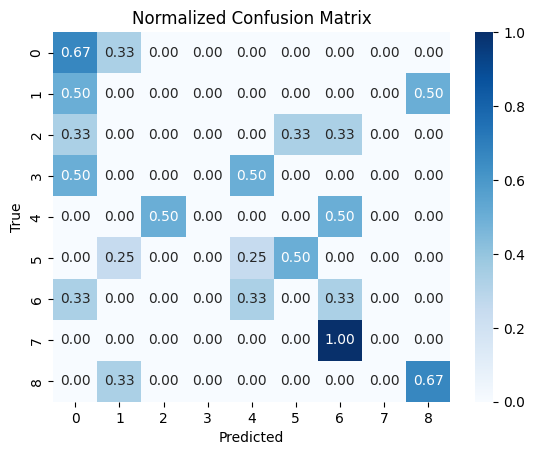

Acurácia do modelo antes do sfk: 33.33%
F1-Score do modelo antes do sfk: 31.35%


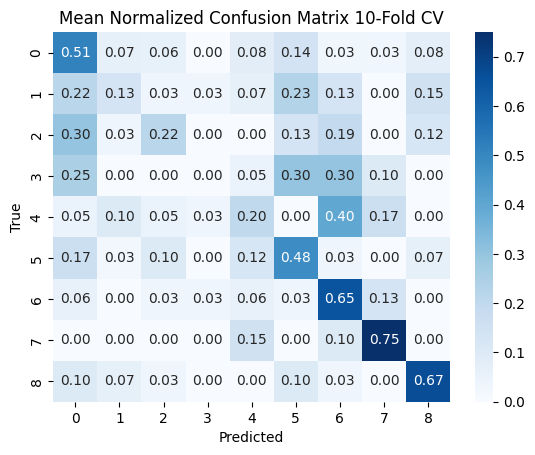

Média da Acurácia do modelo depois do sfk: 44.07%
Média do F1-Score do modelo depois do sfk: 41.14%


In [231]:
# Dados de entrada
X = np.array(X)
y = np.array(y)

# Instanciar o classificador Naive Bayes
naive_bayes_classifier = GaussianNB()

# Sem Stratified K-Fold
naive_bayes_classifier.fit(X_train, y_train)

# Fazer as predições com o conjunto de teste
y_pred = naive_bayes_classifier.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

# Calcular o f1-score do modelo
f1 = f1_score(y_test, y_pred, average='weighted')

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
norm_conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Montar e exibir o gráfico da matriz de confusão
plt.figure()
sns.heatmap(norm_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Imprimir a acurácia e o f1-score
print('Acurácia do modelo antes do sfk: {:.2f}%'.format(accuracy * 100))
print('F1-Score do modelo antes do sfk: {:.2f}%'.format(f1 * 100))


# Com Stratified K-Fold
sfk = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
confusion_matrices = []

# Loop para o K-Fold
for train_index, test_index in sfk.split(X, y):
    # Dividir os dados de teste e treino
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinar o modelo
    naive_bayes_classifier.fit(X_train, y_train)

    # Fazer as predições com o conjunto de teste
    y_pred = naive_bayes_classifier.predict(X_test)

    # Calcular a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Calcular o f1-score do modelo
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

    # Calcular a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

# Normalizar as matrizes de confusão
norm_confusion_matrices = [conf_matrix / conf_matrix.sum(axis=1, keepdims=True) for conf_matrix in confusion_matrices]

# Calcular a média das matrizes normalizadas
mean_norm_confusion_matrices = np.mean(norm_confusion_matrices, axis=0)

# Montar e exibir o gráfico da matriz de confusão
plt.figure()
sns.heatmap(mean_norm_confusion_matrices, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Mean Normalized Confusion Matrix 10-Fold CV')
plt.show()

# Exibir a acurácia e o f1-score médios
print('Média da Acurácia do modelo depois do sfk: {:.2f}%'.format(np.mean(accuracy_scores) * 100))
print('Média do F1-Score do modelo depois do sfk: {:.2f}%'.format(np.mean(f1_scores) * 100))

Podemos ver que, após o uso da validação cruzada estratificada 10-fold no Naives Bayes, nossos valores de acurácia e f1-score subiram. Isso pode se dar ao fato da aplicação do sfkcv evitar problemas de viés e fornecer amostras mais representativas para treinamento e teste, o que é crucial para modelos de Naive Bayes, que se baseiam em estimativas de probabilidade.

##MLP

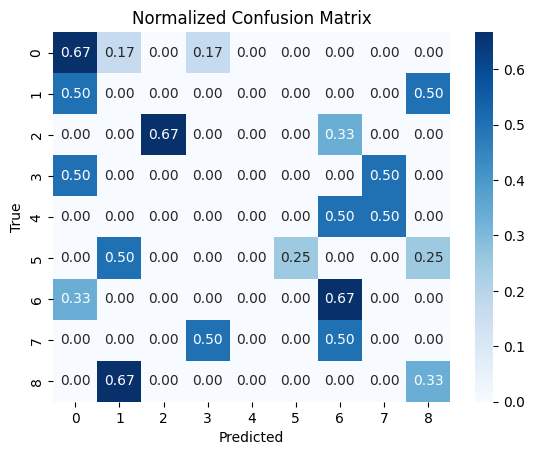

Acurácia do modelo antes do sfk: 37.04%
F1-Score do modelo antes do sfk: 37.75%


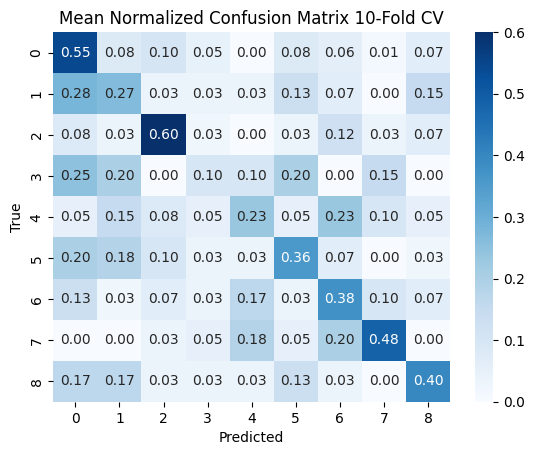

Média da Acurácia do modelo depois do sfk: 41.85%
Média do F1-Score do modelo depois do sfk: 40.70%


In [232]:
# Converter os dados para numpy array
X = np.array(X)
y = np.array(y)

# Instanciar um StandardScaler para escalonamento dos dados
scaler = StandardScaler()

# Escalonar os dados de treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instanciar o classificador MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(500, 250), max_iter=800, random_state=42)

# Treinamento antes do Stratified K-Fold
mlp_classifier.fit(X_train_scaled, y_train)

# Fazer as predições com o conjunto de teste
y_pred = mlp_classifier.predict(X_test_scaled)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

# Calcular o f1-score do modelo
f1 = f1_score(y_test, y_pred, average='weighted')

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
norm_conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Montar e exibir o gráfico da matriz de confusão
plt.figure()
sns.heatmap(norm_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Imprimir a acurácia e o f1-score
print('Acurácia do modelo antes do sfk: {:.2f}%'.format(accuracy * 100))
print('F1-Score do modelo antes do sfk: {:.2f}%'.format(f1 * 100))


# Aplicar o Stratified K-Fold Cross-Validation
sfk = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
confusion_matrices = []

# Loop para o K-Fold
for train_index, test_index in sfk.split(X, y):
    # Dividir os dados de teste e treino
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Escalonar os dados
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Treinar o modelo MLP
    mlp_classifier.fit(X_train_scaled, y_train)

    # Fazer as predições com o conjunto de teste
    y_pred = mlp_classifier.predict(X_test_scaled)

    # Calcular a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Calcular o f1-score do modelo
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

    # Calcular a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

# Normalizar as matrizes de confusão
norm_confusion_matrices = [conf_matrix / conf_matrix.sum(axis=1, keepdims=True) for conf_matrix in confusion_matrices]

# Calcular a média das matrizes normalizadas
mean_norm_confusion_matrices = np.mean(norm_confusion_matrices, axis=0)

# Montar e exibir o gráfico da matriz de confusão
plt.figure()
sns.heatmap(mean_norm_confusion_matrices, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Mean Normalized Confusion Matrix 10-Fold CV')
plt.show()

# Exibir a acurácia e o f1-score médios
print('Média da Acurácia do modelo depois do sfk: {:.2f}%'.format(np.mean(accuracy_scores) * 100))
print('Média do F1-Score do modelo depois do sfk: {:.2f}%'.format(np.mean(f1_scores) * 100))

Podemos ver que, após o uso da validação cruzada estratificada 10-fold no MLP, nossos valores de acurácia e f1-score subiram. Isso pode se dar ao fato de, com a aplicação do sfkcv, o modelo é treinado em diferentes subconjuntos do conjunto de dados original. Com várias iterações de treinamento, o MLP "vê" mais dados e, portanto, aprende de forma mais robusta.

##Considerações finais da aprendizagem supervisionada
Após análisar todas as 6 matrizes, podemos concluir que tivemos o melhor desempenho utilizando o método de Árvores de Decisão sem a validação cruzada estratificada 10-fold.

#Aprendizagem não-supervisionada

Aqui vamos comparar 2 modelos, sendo eles o K-Means e o Agrupamento Hierárquico e para a análise dos resultados iremos usar Silhouette Score e Cluster

In [233]:
# Gerar dados sintéticos para clusterização
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

##K-Means
Vamos rodar o teste do cotovelo para achar o valor ideal de K e usá-lo posteriormente

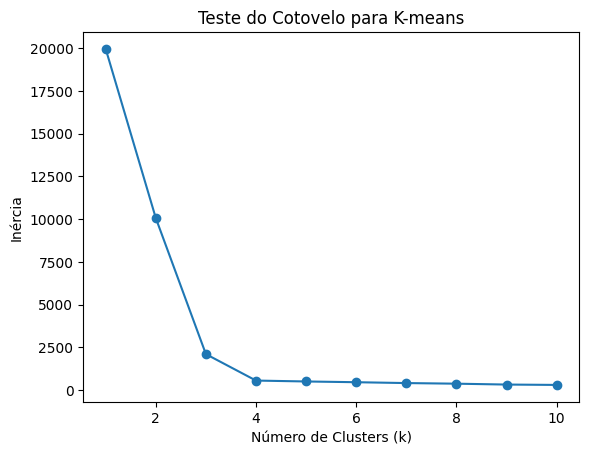

In [234]:
# TESTE DO COTOVELO PARA K-MEANS
# Testar valores de 1 a 10 clusters para encontrar o "cotovelo"
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_init='auto', n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Visualizar o teste do cotovelo
plt.figure()
plt.plot(k_values, inertia_values, '-o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Teste do Cotovelo para K-means')
plt.show()

Silhouette Score para K-means: 0.79


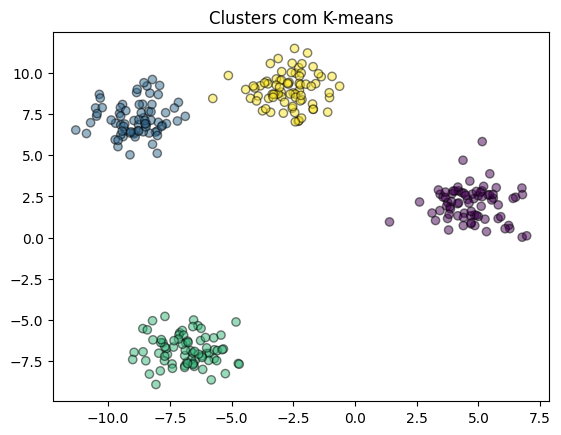

In [235]:
# Aplicar K-means com o valor ideal de K indicado no gráfico (K = 4)
kmeans = KMeans(n_init='auto', n_clusters=4, random_state=42)
kmeans.fit(X)

# Avaliar K-means com Silhouette Score
silhouette_kmeans = silhouette_score(X, kmeans.labels_)

# Visualizar os resultados para o K-Means
print(f"Silhouette Score para K-means: {silhouette_kmeans:.2f}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, edgecolors='k')
plt.title('Clusters com K-means')
plt.show()

##Clustering Hierárquico

Silhouette Score para Hierarchical (Ward): 0.79


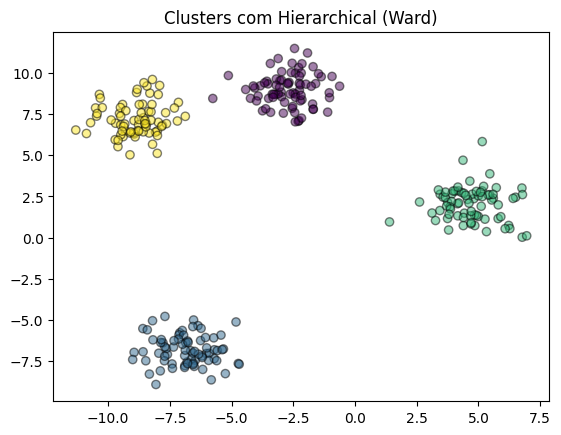



Silhouette Score para Hierarchical (Complete): 0.79


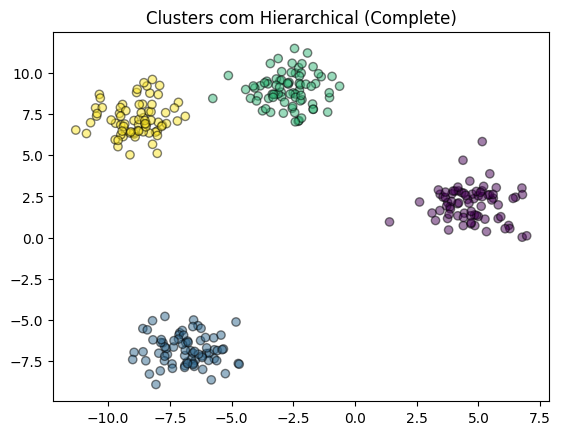

In [236]:
# Aplicar Clustering Hierárquico com dois métodos de Linkage com o n_clusters igual ao K (4)
agg_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')

agg_ward.fit(X)
agg_complete.fit(X)

silhouette_ward = silhouette_score(X, agg_ward.labels_)
silhouette_complete = silhouette_score(X, agg_complete.labels_)

# Visualizar os resultados para o Hierárquico (Ward)
print(f"Silhouette Score para Hierarchical (Ward): {silhouette_ward:.2f}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=agg_ward.labels_, cmap='viridis', alpha=0.5, edgecolors='k')
plt.title('Clusters com Hierarchical (Ward)')
plt.show()

print("\n")

# Visualizar os resultados para o Hierárquico (Complete)
print(f"Silhouette Score para Hierarchical (Complete): {silhouette_complete:.2f}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=agg_complete.labels_, cmap='viridis', alpha=0.5, edgecolors='k')
plt.title('Clusters com Hierarchical (Complete)')
plt.show()

##Avaliação extra
Agora vamos avaliar o K-Means e as duas execuções do Hierárquico usando coeficientes de separação e de compactação dos clusters

In [237]:
def cluster_compaction(X, labels):
    """ Mede a média da distância intra-cluster """
    n_clusters = len(np.unique(labels))
    compactness = 0
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        centroid = np.mean(cluster_points, axis=0)
        compactness += np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
    return compactness / n_clusters

In [238]:
def cluster_separation(X, labels):
    """ Mede a distância média inter-cluster """
    n_clusters = len(np.unique(labels))
    cluster_centroids = np.array([np.mean(X[labels == i], axis=0) for i in range(n_clusters)])
    separation = 0
    count = 0
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            separation += np.linalg.norm(cluster_centroids[i] - cluster_centroids[j])
            count += 1
    return separation / count

In [239]:
compactness_kmeans = cluster_compaction(X, kmeans.labels_)
compactness_ward = cluster_compaction(X, agg_ward.labels_)
compactness_complete = cluster_compaction(X, agg_complete.labels_)

print(f"Coeficiente de Compactação para K-means: {compactness_kmeans:.2f}")
print(f"Coeficiente de Compactação para Hierarchical (Ward): {compactness_ward:.2f}")
print(f"Coeficiente de Compactação para Hierarchical (Complete): {compactness_complete:.2f}")

Coeficiente de Compactação para K-means: 1.22
Coeficiente de Compactação para Hierarchical (Ward): 1.22
Coeficiente de Compactação para Hierarchical (Complete): 1.22


In [240]:
separation_kmeans = cluster_separation(X, kmeans.labels_)
separation_ward = cluster_separation(X, agg_ward.labels_)
separation_complete = cluster_separation(X, agg_complete.labels_)

print(f"Coeficiente de Separação para K-means: {separation_kmeans:.2f}")
print(f"Coeficiente de Separação para Hierarchical (Ward): {separation_ward:.2f}")
print(f"Coeficiente de Separação para Hierarchical (Complete): {separation_complete:.2f}")

Coeficiente de Separação para K-means: 12.69
Coeficiente de Separação para Hierarchical (Ward): 12.69
Coeficiente de Separação para Hierarchical (Complete): 12.69


##Considerações finais da aprendizagem não-supervisionada
Após a análise de todos os coeficientes, gráficos de clusters e silhouettes scores, vemos que nosso resultado não se alterou. Isso pode se dar ao fato de que o valor de K foi mantido fixo durante todas as implementações, bem como uma boa estrutura da nossa base de dados.